In [23]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
import os
import random
import shutil
import pathlib
import numpy as np

def split_dir_to_train_test_val(directory="/content/drive/MyDrive/Multiclass",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1):
  """
  Membuat 3 folder untuk data Train, Test dan Validation
  """
  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    # Skip the root directory to avoid copying itself
    if root == directory:
      continue

    for folder in folders:
      # Buat list file
      list_of_files = []
      for file_name in os.listdir(os.path.join(root, folder)):
        list_of_files.append(file_name)

      # Acak list
      rng.shuffle(list_of_files)

      # Buat list file untuk train, test, dan validation
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Buat folder dan file untuk data train
      for one_file in train_files:
        dest_dir = os.path.join(directory, "train", folder)
        os.makedirs(dest_dir, exist_ok=True)
        # Get the source file path by joining the original root, folder, and filename
        src_file_path = os.path.join(root, folder, one_file)
        dst_file_path = os.path.join(dest_dir, one_file) # Build destination path
        # Only copy if it's a file, not a directory and doesn't already exist in the destination
        if os.path.isfile(src_file_path) and not os.path.exists(dst_file_path):
          shutil.copy2(src=src_file_path,
                      dst=dst_file_path)
      print(f"Folder {folder}. Data train disalin. {len(train_files)} file")

      # Buat folder dan file untuk data test
      for one_file in test_files:
        dest_dir = os.path.join(directory, "test", folder)
        os.makedirs(dest_dir, exist_ok=True)
        # Get the source file path by joining the original root, folder, and filename
        src_file_path = os.path.join(root, folder, one_file)
        dst_file_path = os.path.join(dest_dir, one_file) # Build destination path
        # Only copy if it's a file, not a directory and doesn't already exist in the destination
        if os.path.isfile(src_file_path) and not os.path.exists(dst_file_path):
          shutil.copy2(src=src_file_path,
                      dst=dst_file_path)
      print(f"Folder {folder}. Data test disalin. {len(test_files)} file")

      # Buat folder dan file untuk data validation
      for one_file in val_files:
        dest_dir = os.path.join(directory, "val", folder)
        os.makedirs(dest_dir, exist_ok=True)
        # Get the source file path by joining the original root, folder, and filename
        src_file_path = os.path.join(root, folder, one_file)
        dst_file_path = os.path.join(dest_dir, one_file) # Build destination path
        # Only copy if it's a file, not a directory and doesn't already exist in the destination
        if os.path.isfile(src_file_path) and not os.path.exists(dst_file_path):
          shutil.copy2(src=src_file_path,
                      dst=dst_file_path)
      print(f"Folder {folder}. Data validation disalin. {len(val_files)} file")


def get_class_names_from_folder(directory):
  """
  Mendapatkan nama kelas dari folder train misalnya
  """
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Membuat list nama kelas
  return class_names

In [25]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="/content/drive/MyDrive/Multiclass",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder bread. Data train disalin. 420 file
Folder bread. Data test disalin. 120 file
Folder bread. Data validation disalin. 61 file
Folder fish. Data train disalin. 903 file
Folder fish. Data test disalin. 258 file
Folder fish. Data validation disalin. 130 file
Folder milk. Data train disalin. 1140 file
Folder milk. Data test disalin. 326 file
Folder milk. Data validation disalin. 163 file
Folder sausages. Data train disalin. 919 file
Folder sausages. Data test disalin. 263 file
Folder sausages. Data validation disalin. 132 file
Folder onions. Data train disalin. 310 file
Folder onions. Data test disalin. 89 file
Folder onions. Data validation disalin. 45 file
Folder eggs. Data train disalin. 308 file
Folder eggs. Data test disalin. 88 file
Folder eggs. Data validation disalin. 45 file
Folder spinach. Data train disalin. 282 file
Folder spinach. Data test disalin. 80 file
Folder spinach. Data validation disalin. 41 file
Folder banana. Data train disalin. 269 file
Folder banana. Data te

In [26]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="/content/drive/MyDrive/Multiclass/train/")
class_names

array(['bacon', 'banana', 'bread', 'broccoli', 'butter', 'carrots',
       'cheese', 'chicken', 'cucumber', 'eggs', 'fish', 'lettuce', 'milk',
       'onions', 'peppers', 'potatoes', 'sausages', 'spinach', 'tomato',
       'yogurt'], dtype='<U8')

In [27]:
len(class_names)

20

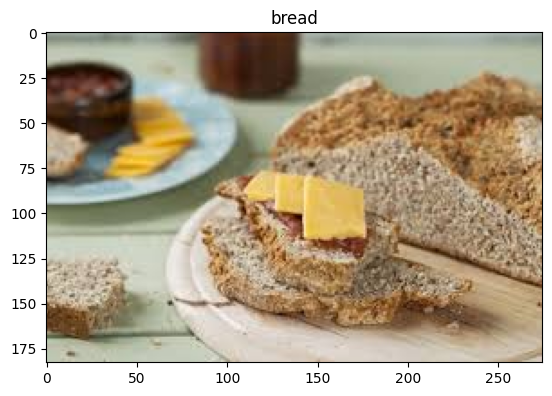

In [37]:
# Let's visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  # Fix: Added os.path.join to correctly form the path
  image_dir = os.path.join(target_dir, target_class)
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("/content/drive/MyDrive/Multiclass/test", "bread")

In [29]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Inisialisasi generator untuk normalisasi data gambar
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Path ke direktori dataset
directory = "/content/drive/MyDrive/Multiclass"

# Load data dari folder
train_data = train_datagen.flow_from_directory(
    os.path.join(directory, "train"),
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    os.path.join(directory, "test"),
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical"
)

validation_data = val_datagen.flow_from_directory(
    os.path.join(directory, "val"),
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical"
)


Found 11539 images belonging to 20 classes.
Found 10026 images belonging to 20 classes.
Found 9129 images belonging to 20 classes.


In [30]:
# Set seed agar hasil konsisten
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Load training data
train_data = train_datagen.flow_from_directory(
    os.path.join(directory, "train"),
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical"
)

from tensorflow.keras import backend as K
K.clear_session()

# Ambil jumlah kelas dari folder
num_classes = train_data.num_classes  # jumlah kelas otomatis

model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation="softmax")  # gunakan variabel
])

# Kompilasi model
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)


Found 11539 images belonging to 20 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history = model.fit(
    train_data,
    steps_per_epoch=7,
    epochs=25,
    validation_data=validation_data,
    validation_steps=1,
    verbose=1,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.0955 - loss: 3.2840 - val_accuracy: 0.0312 - val_loss: 2.9321
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.1324 - loss: 2.9591 - val_accuracy: 0.1562 - val_loss: 2.8763
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.1703 - loss: 2.7466 - val_accuracy: 0.1562 - val_loss: 2.7339
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2125 - loss: 2.6238 - val_accuracy: 0.1875 - val_loss: 2.6657
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2180 - loss: 2.5931 - val_accuracy: 0.1875 - val_loss: 2.7187
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2151 - loss: 2.5968 - val_accuracy: 0.2188 - val_loss: 2.5896
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.2648 - loss: 2.4511 - val_accuracy: 0.3438 - val_loss: 2.1246
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2371 - loss: 2.4960 - val_accuracy: 0.3125 - val_loss: 2.1586
Epoch 9/25

In [32]:
print(train_data.num_classes)


20


In [34]:
model.evaluate(test_data)

314/314 ━━━━━━━━━━━━━━━━━━━━ 176s 561ms/step - accuracy: 0.3865 - loss: 1.9809


[1.972083330154419, 0.3887891471385956]

<Axes: >

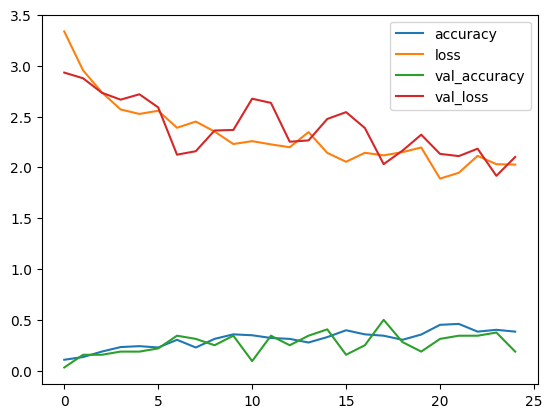

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [60]:
# Download image
!wget https://i.pinimg.com/736x/4c/62/db/4c62db155820aff8929bda6113f2c998.jpg
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("4c62db155820aff8929bda6113f2c998.jpg", 240)

--2025-05-21 07:51:03--  https://i.pinimg.com/736x/4c/62/db/4c62db155820aff8929bda6113f2c998.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.47.72.209, 23.47.72.143, 2a04:4e42::84, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.47.72.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22248 (22K) [image/jpeg]
Saving to: ‘4c62db155820aff8929bda6113f2c998.jpg’

4c62db155820aff8929 100%[===================>]  21.73K  --.-KB/s    in 0.002s  

2025-05-21 07:51:03 (8.85 MB/s) - ‘4c62db155820aff8929bda6113f2c998.jpg’ saved [22248/22248]



In [63]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


array([[0.09915297, 0.09550314, 0.10564297, 0.1187866 , 0.0903936 ,
        0.09752523, 0.09188136, 0.10169949, 0.10341004, 0.09600466]],
      dtype=float32)

In [66]:
class_names[pred[0].argmax()]

'sausages'